# Hijerarhijsko klasterovanje

# Predprocesiranje

In [2]:
import pandas as pd

df = pd.read_csv('Data/dogs.csv')

feature_names = df.columns[1:].tolist()

X = df[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


## Sakupljajuce klasterovanje

In [7]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')
model.fit(X)

print(model.labels_)
print(model.children_)

[10  5  7  8  9  6  3  4  1  2  0]
[[ 0  8]
 [ 4 10]
 [ 6  5]
 [11  2]
 [14  9]
 [15  1]
 [16 13]
 [17  3]
 [18 12]
 [19  7]]


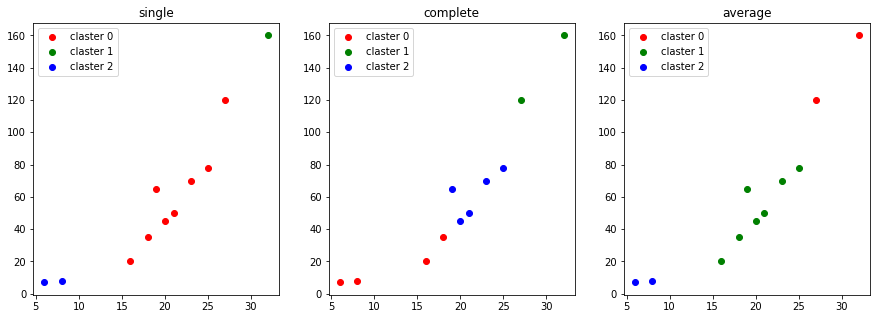

In [16]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(15, 5))
n_clusters=3
for i, link in enumerate(['single', 'complete', 'average']):
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    model.fit(X)
    
    df['label'] = model.labels_
    
    fig.add_subplot(1, n_clusters, i + 1)
    plt.title(link)
    for claster_label in range(n_clusters):
        claster = df[df['label'] == claster_label]
        
        plt.scatter(
            claster['height'], claster['weight'], 
            color=colors[claster_label], label=f'claster {claster_label}'
        )
    plt.legend()
    
plt.show()
        

## Postprocesiranje

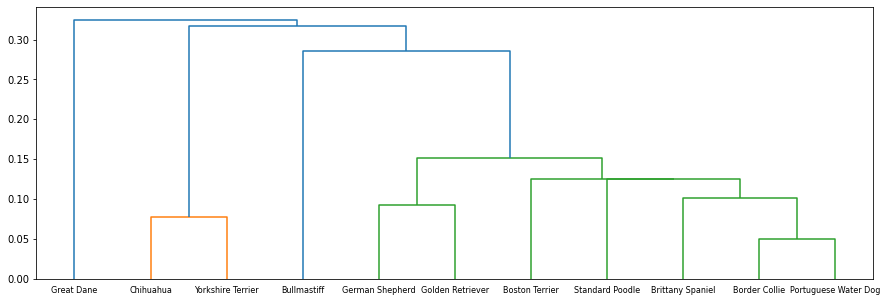

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('Data/dogs.csv')
df.set_index('breed', inplace=True)

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=feature_names)

Z = linkage(X)

fig = plt.figure(figsize=(15, 5))
D = dendrogram(Z, labels=df.index, leaf_font_size=8, show_contracted=True)
plt.show()

# BDSCAN

## Preprocesiranje

In [26]:
import pandas as pd

df = pd.read_csv('Data/dogs.csv')
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


## DBSCAN: Algoritam

In [32]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=2)
model.fit(X)

model.labels_

array([ 0,  0,  0,  0,  1,  0,  0, -1,  0,  0,  1])

## Evaluacija modela

In [34]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.labels_)

0.4306542372423945

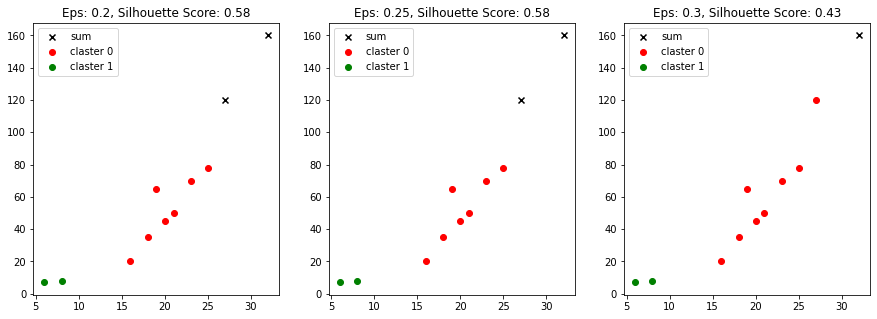

In [52]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(15, 5))
eps_values = [0.2, 0.25, 0.3]
for i, eps in enumerate(eps_values):
    model = DBSCAN(eps, min_samples=2)
    model.fit(X)
    
    df['label'] = model.labels_
    
    n_clusters = max(model.labels_) + 1
    
    fig.add_subplot(1, len(eps_values), i + 1)
    plt.title(f'Eps: {eps}, Silhouette Score: {round(silhouette_score(X, model.labels_), 2)}')
    for claster_label in range(-1, n_clusters):
        claster = df[df['label'] == claster_label]
        
        if claster_label == -1:
            plt.scatter(
                claster['height'], claster['weight'], 
                color='black', marker='x', label='sum'
            )
        else:
            plt.scatter(
                claster['height'], claster['weight'], 
                color=colors[claster_label], label=f'claster {claster_label}'
            )
    plt.legend()
    
plt.show()